## Exploratory Data Analysis on Customer Ratings and Preferences

This notebook provides an exploratory data analysis (EDA) on a dataset of customer reviews and ratings for various cuisines. The aim of this analysis is to identify patterns and relationships between customer demographics, preferences, and satisfaction levels. We will explore how different factors such as gender, location, budget, and activities influence food, service, and overall ratings.


In [2]:
from google.colab import files

upload = files.upload()

Saving Cuisine_rating.csv to Cuisine_rating.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview

In [5]:
df = pd.read_csv("Cuisine_rating.csv")
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [8]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


### Missing Values and Duplicates

In [9]:
df.isna().sum()

,0
User ID,0
Area code,0
Location,0
Gender,0
YOB,0
Marital Status,0
Activity,0
Budget,0
Cuisines,0
Alcohol,0


In [10]:
df.nunique()

,0
User ID,200
Area code,65
Location,10
Gender,2
YOB,46
Marital Status,3
Activity,2
Budget,5
Cuisines,7
Alcohol,3


In [11]:
df.duplicated().sum()

0

### Distribution of Ratings

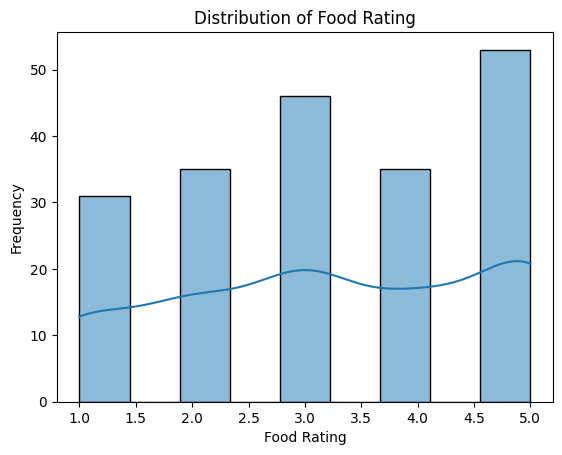

In [22]:
sns.histplot(df['Food Rating'],kde =True)
plt.title("Distribution of Food Rating")
plt.xlabel("Food Rating")
plt.ylabel("Frequency")
plt.show()

In [20]:
df["Food Rating"].mean()

3.22

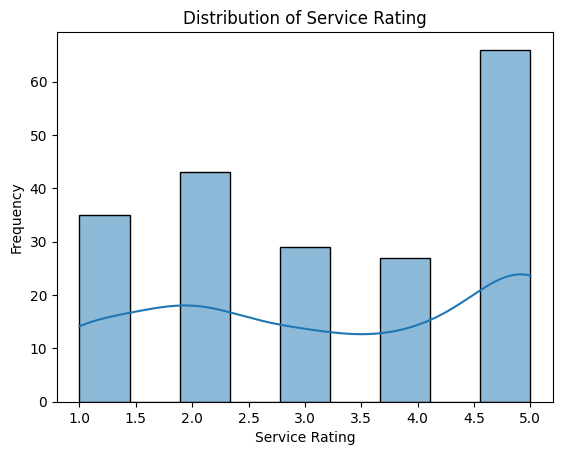

In [21]:
sns.histplot(df["Service Rating"],kde=True)
plt.title("Distribution of Service Rating")
plt.xlabel("Service Rating")
plt.ylabel("Frequency")
plt.show()

In [23]:
df["Service Rating"].mean()

3.23

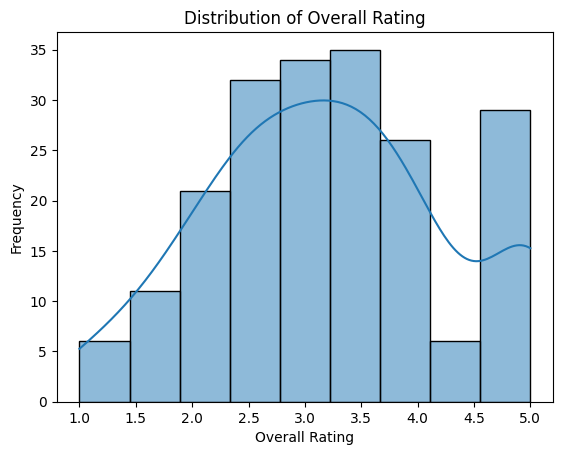

In [25]:
sns.histplot(df["Overall Rating"],kde =True)
plt.title("Distribution of Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

In [26]:
df["Overall Rating"].mean()

3.225

### Cuisine Preferences

In [29]:
df["Cuisines"].value_counts()

,count
Cuisines,
Japanese,36
Filipino,34
French,34
Indian,32
Chinese,24
Seafood,22
Italian,18


In [42]:
avg_cuisine_rating = df.groupby("Cuisines")["Food Rating"].mean().reset_index()
avg_cuisine_rating

,Cuisines,Food Rating
0,Chinese,3.458333
1,Filipino,2.705882
2,French,3.294118
3,Indian,2.781250
4,Italian,3.222222
5,Japanese,3.861111
6,Seafood,3.227273


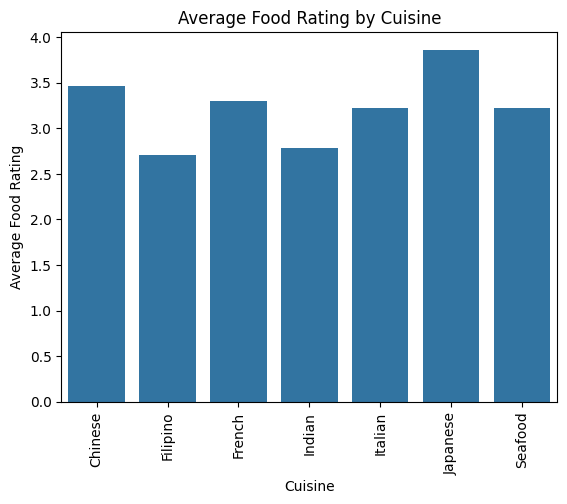

In [43]:
sns.barplot(x="Cuisines",y="Food Rating",data=avg_cuisine_rating)
plt.title("Average Food Rating by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Average Food Rating")
plt.xticks(rotation = 90)
plt.show()

### Gender-Based Rating Analysis

In [48]:
avg_gender_rating = df.groupby("Gender")["Overall Rating"].mean().reset_index()
avg_gender_rating

,Gender,Overall Rating
0,Female,3.335366
1,Male,3.148305


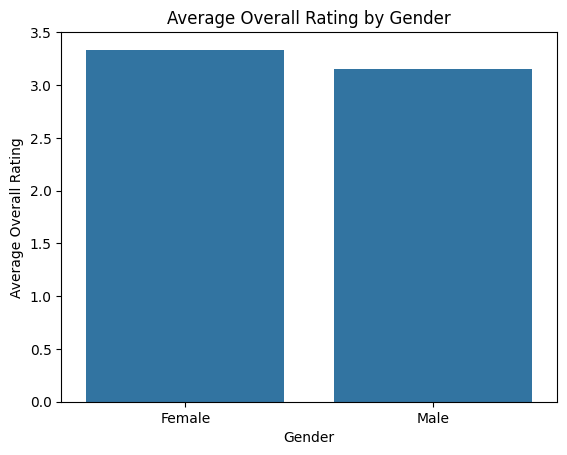

In [49]:
sns.barplot(x="Gender",y="Overall Rating",data=avg_gender_rating)
plt.title("Average Overall Rating by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Overall Rating")
plt.show()

### Profession-Based Cuisine Preferences

In [51]:
cuisine_by_profession = df.groupby(["Activity","Cuisines"])["Food Rating"].mean().reset_index()
cuisine_by_profession

,Activity,Cuisines,Food Rating
0,Professional,Chinese,3.750000
1,Professional,Filipino,3.214286
2,Professional,French,3.875000
3,Professional,Indian,2.888889
4,Professional,Italian,2.333333
5,Professional,Japanese,3.833333
6,Professional,Seafood,3.666667
7,Student,Chinese,3.312500
8,Student,Filipino,2.350000
9,Student,French,2.777778


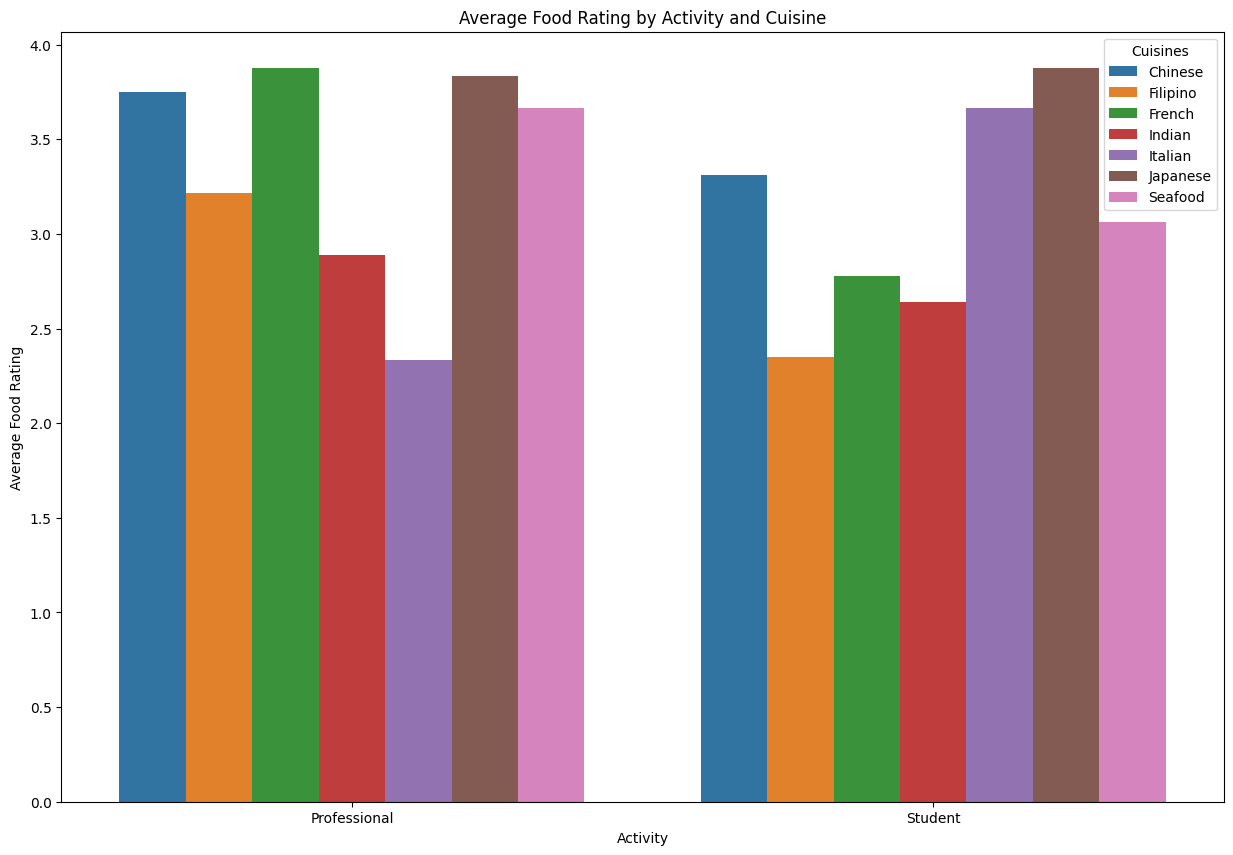

In [60]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Activity",y="Food Rating",hue="Cuisines",data=cuisine_by_profession)
plt.title("Average Food Rating by Activity and Cuisine")
plt.xlabel("Activity")
plt.ylabel("Average Food Rating")
plt.show()

### Location-Based Rating Analysis

In [68]:
cuisine = df.groupby('Location')['Overall Rating'].mean()

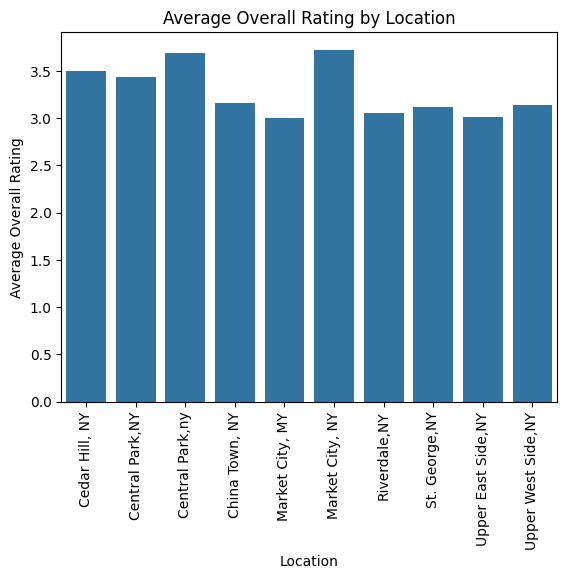

In [69]:
sns.barplot(x=cuisine.index,y=cuisine.values)
plt.title("Average Overall Rating by Location")
plt.xlabel("Location")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=90)
plt.show()

### Smoking and Alcohol Consumption

<Axes: xlabel='Smoker', ylabel='count'>

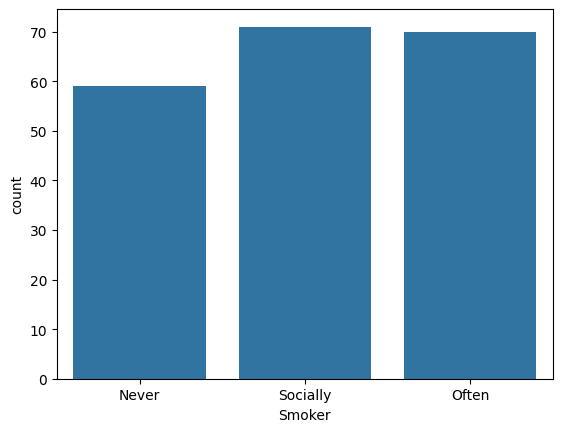

In [70]:
sns.countplot(x="Smoker", data=df)

<Axes: xlabel='Alcohol', ylabel='count'>

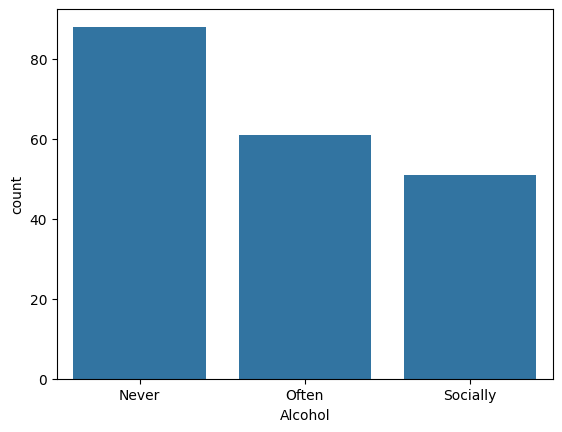

In [71]:
sns.countplot(x="Alcohol", data=df)

### Correlation Analysis

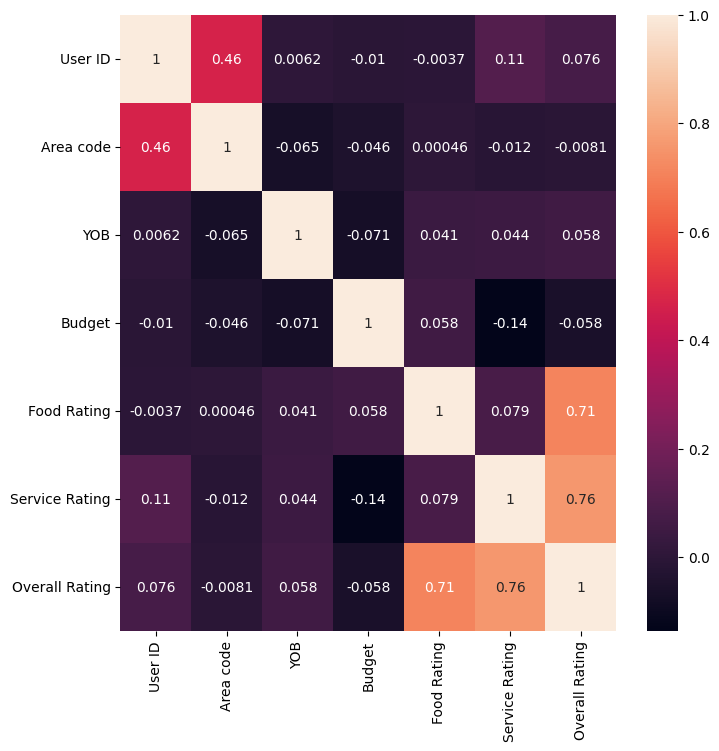

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

## Conclusion

The exploratory analysis provided insights into customer preferences and satisfaction levels based on various demographic and behavioral factors. We observed that certain cuisines, such as Japanese and Seafood, tend to receive higher ratings, while factors like gender and location also influence overall satisfaction. Further analysis could include advanced segmentations or predictive modeling to better understand customer behavior.
